In [130]:
import pandas as pd
import numpy as np
from datetime import datetime

# Основной датасет

In [131]:
df = pd.read_csv("data/T_games_dataset.csv")
df

,id,client_id,order_day,category_id,category_name,good_id,good_name,good_price,good_cnt,gender_cd,age,education_level,city_nm,monthly_income_amt,steam_popularity_score
0,1500571355,5-25R6ZT3L9,2023-05-22,29688,Скидки,890257,The Night of the Rabbit,299.00,1.0,M,28,UGR,Москва,73552,0.0
1,1500571245,5-2P4Z5VSMF,2023-05-22,28574,Ролевые (RPG),1436296,Ni no Kuni Wrath of the White Witch Remastered,269.85,1.0,M,26,GRD,Москва,281417,0.0
2,1500573164,5-YGO64ONA,2023-05-24,30659,Казуальные игры,1179848,KeyWe - The 100th Annual Grand Ol' Telepost To...,77.00,1.0,M,30,GRD,Москва,86000,0.0
3,1500364601,5-1VA0D94LX,2022-10-23,29688,Скидки,1204914,GTFO,1675.01,1.0,M,24,GRD,Самара,56000,283.0
4,1500288143,5-1QCUV9SY7,2022-07-03,28577,Экшн,1314503,Neon White,550.00,1.0,M,38,GRD,Санкт-Петербург,32000,1676.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88694,1500300796,5-355R05SQ3,2022-07-23,28577,Экшн,848833,Apex Legends: 1000 Coins - DLC,749.00,1.0,M,18,SCH,Москва,170486,0.0
88695,1500302138,5-2IKJ0HXNU,2022-07-25,28577,Экшн,848833,Apex Legends: 1000 Coins - DLC,749.00,1.0,M,19,UGR,Самара,38000,0.0
88696,1500351510,5-8EVSLK13,2022-10-05,28577,Экшн,1406123,Dome Keeper - Deluxe Edition,561.60,1.0,M,33,SCH,Краснодар,230000,0.0
88697,1500476540,5-122LQCE7M,2023-02-13,28574,Ролевые (RPG),848895,Gothic Universe Edition,59.80,1.0,M,37,GRD,Москва,170000,0.0


In [132]:
df.describe()

,id,category_id,good_id,good_price,good_cnt,age,monthly_income_amt,steam_popularity_score
count,8.869900e+04,88699.000000,8.869900e+04,88699.000000,88699.0,88699.000000,8.869900e+04,88699.000000
mean,1.500462e+09,28968.248932,1.135675e+06,584.402189,1.0,26.600187,9.026706e+04,475.555395
std,1.448781e+05,1061.080699,2.831782e+05,877.856786,0.0,8.312742,1.422906e+05,1008.816453
min,1.500208e+09,28555.000000,8.472910e+05,2.320000,1.0,1.000000,-5.246740e+05,0.000000
25%,1.500337e+09,28562.000000,8.488950e+05,119.200000,1.0,20.000000,2.600000e+04,0.000000
50%,1.500457e+09,28574.000000,1.123866e+06,329.000000,1.0,26.000000,6.800000e+04,0.000000
75%,1.500578e+09,28577.000000,1.395053e+06,679.000000,1.0,32.000000,1.381100e+05,282.000000
max,1.500750e+09,35255.000000,1.774802e+06,10656.300000,1.0,86.000000,7.190000e+06,4981.000000


In [133]:
print("Количество записей:", len(df))
print("Количество игр:", len(df.good_id.unique()))
print("Количество клиентов:", len(df.client_id.unique()))

Количество записей: 88699
Количество игр: 3237
Количество клиентов: 41298


In [134]:
print("Медианный доход:", df.monthly_income_amt.median())
print("Средний доход:", df.monthly_income_amt.mean())

Медианный доход: 68000.0
Средний доход: 90267.05887326802


## Добавление новых переменных

In [135]:
df["order_timestamp"] = pd.to_datetime(df['order_day']).apply(datetime.timestamp)
df["education_level"] = df["education_level"].apply(lambda level: level if isinstance(level, int) else [
    "SCH",
    "UGR",
    "GRD",
    "PGR",
    "ACD",
].index(level))
df["is_dlc"] = (df["good_name"].str.contains("DLC", case=False) | df["good_name"].str.contains("pack", case=False)) & ~df["good_name"].str.contains("coins", case=False)

## Матрица корелляции

In [136]:
df[["good_price", "age", "monthly_income_amt", "steam_popularity_score", "order_timestamp", "education_level"]].corr()

,good_price,age,monthly_income_amt,steam_popularity_score,order_timestamp,education_level
good_price,1.000000,0.062653,0.063729,-0.136922,0.069814,0.005016
age,0.062653,1.000000,0.098496,-0.018706,-0.113342,0.097403
monthly_income_amt,0.063729,0.098496,1.000000,-0.002438,-0.035293,0.046703
steam_popularity_score,-0.136922,-0.018706,-0.002438,1.000000,-0.009022,-0.002910
order_timestamp,0.069814,-0.113342,-0.035293,-0.009022,1.000000,-0.014579
education_level,0.005016,0.097403,0.046703,-0.002910,-0.014579,1.000000


## Обработка выбросов

In [137]:
unfiltered = df.copy()

In [138]:
df = df[df.age >= 7]

### Удаление записей по 95 и 5 перцинтилю для возраста

In [139]:
# 95 перцинтиль с каждой стороны
down_p = np.percentile(unfiltered.age, 5)
up_p = np.percentile(unfiltered.age, 95)
print(down_p, up_p)

df = df[(df.age >= down_p) & (df.age <= up_p)]

15.0 41.0


### Перцентили для дохода (5 и 95, 25 и 75)

In [156]:
np.percentile(unfiltered.monthly_income_amt, 5), np.percentile(unfiltered.monthly_income_amt, 95)

(-80213.59999999999, 300299.4999999989)

In [157]:
np.percentile(unfiltered.monthly_income_amt, 25), np.percentile(unfiltered.monthly_income_amt, 75)

(26000.0, 138110.0)

### Удаление дубликатов
**Дубликатами считаются те случаи, когда один и тот же человек покупал одну и ту же игру более одного раза.**

Случаи, когда могут появиться дубликаты:

1. Данные об заказе подтягиваются из разных источников, и возникают коллизии, когда один и тот же заказ появляется несколько раз. Дата покупки будет одна и та же либо с интервалом ±1 день
2. Клиент действительно покупал один и тот же товар несколько раз для себя.
3. Клиент действительно покупал один и тот же товар несколько раз, но для друга или своего знакомого. В этом случае мы **предполагаем**, что в первый раз он покупал игру для себя.
4. Клиент действительно покупал один и тот же товар несколько раз для перепродажи. Вероятность покупки игр оптом на сервисе Тинькофф Игры невелика, поэтому мы применяем то же действие для дубликатов такого рода, по аналогии с пунктом 3.

Во всех случаях мы удаляем все записи, оставляя только первую.

In [140]:
# Дубликаты (случаи, когда один и тот же клиент покупает один и тот же товар несколько раз)
df = df.drop_duplicates(subset=["client_id", "good_name"], keep="first")

In [154]:
print("Доля отфильтрованных значений:", 1 - len(df) / len(unfiltered))
print("Всего:", len(df), "наименований", len(df.good_name.unique()))
print("Всего DLC:", len(df[df.is_dlc]), "наименований", len(df[df.is_dlc].good_name.unique()))
print("Доля DLC", df.is_dlc.mean())

Доля отфильтрованных значений: 0.14153485383149755
Всего: 76145 наименований 3066
Всего DLC: 13187 наименований 712
Доля DLC 0.1731827434499967


In [142]:
df.to_csv("output/filtered.csv", index=False)

# Датафрейм с информацией о доле покупок DLC для каждого возраста

In [143]:
ratio = pd.DataFrame(
    [
        (age, df[df.age == age].is_dlc.mean())
        for age
        in sorted(df.age.unique())
    ],
    columns=["age", "dlc_ratio"],
)
ratio

,age,dlc_ratio
0,15,0.107859
1,16,0.132804
2,17,0.127451
3,18,0.090608
4,19,0.119722
5,20,0.135651
6,21,0.135229
7,22,0.140482
8,23,0.143093
9,24,0.181287


In [144]:
ratio.corr()

,age,dlc_ratio
age,1.000000,0.851231
dlc_ratio,0.851231,1.000000


In [145]:
# Максимальное количество покупок DLC у одного клиента
df[df.is_dlc].groupby("client_id").size().sort_values(ascending=False)

client_id
5-2FLMLXKNR    36
5-NFHAUVDY     35
5-2TNYGSN38    31
5-1360O92J9    27
5-SGI5PPI2     25
               ..
5-2JMWC7UWQ     1
5-2JLQFSJOB     1
5-2JLG0X4L8     1
5-2JKG6AYKI     1
7-3L2Y99D9W     1
Length: 6345, dtype: int64

## Визуализация

### Распределение доли покупок DLC по возрастам

<Axes: xlabel='age'>

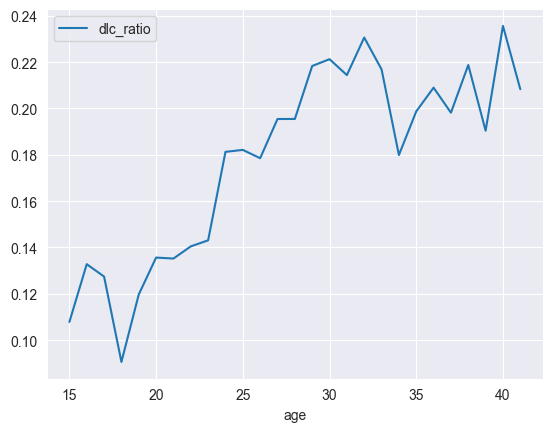

In [146]:
ratio.plot(x="age", y="dlc_ratio")

<Axes: xlabel='age'>

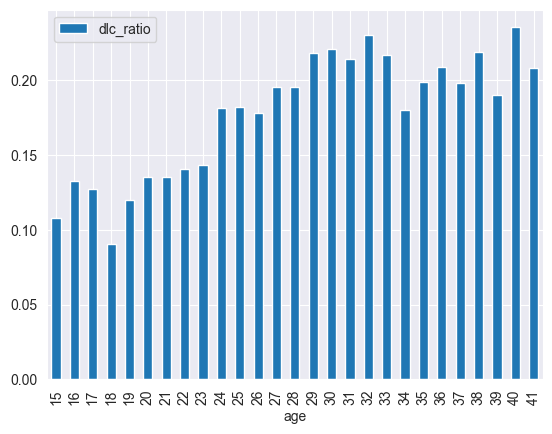

In [147]:
ratio.plot(x="age", y="dlc_ratio", kind="bar")

### Распределение абсолютного количества заказов по возрастам

<Axes: xlabel='age'>

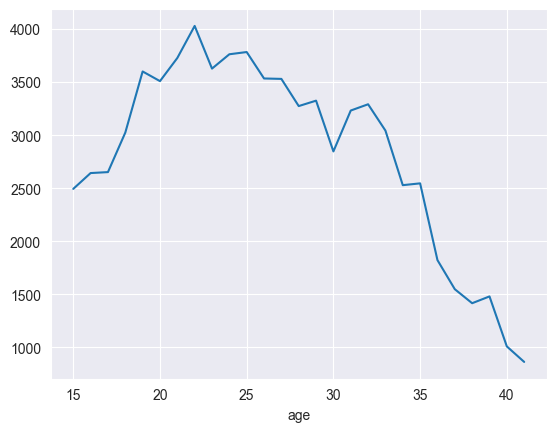

In [148]:
df.groupby("age").size().plot()

### Линейная регрессия

Коэффициенты линейной регрессии для формулы y = mx + b:
m: 0.004432355510016618
b: 0.05390850893864555


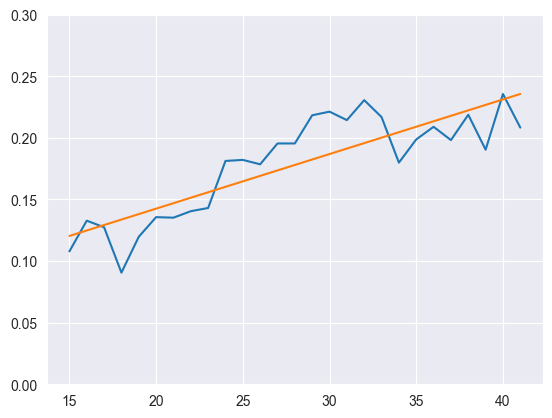

In [149]:
import matplotlib.pyplot as plt

x = ratio["age"]
y = ratio["dlc_ratio"]

plt.plot(x, y)

#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(x, y, 1)
print("Коэффициенты линейной регрессии для формулы y = mx + b:")
print("m:", m)
print("b:", b)

#add linear regression line to scatterplot 
plt.ylim(0, 0.3)
plt.plot(x, m*x+b)
plt.savefig("output/regression.png")

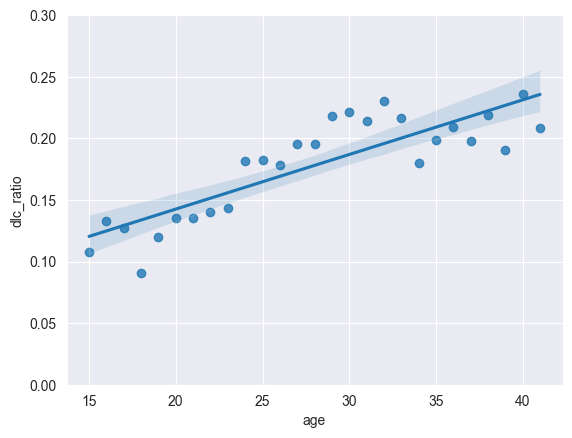

In [150]:
import seaborn as sns

sns.regplot(x='age', y='dlc_ratio', data=ratio)
plt.ylim(0, 0.3)
plt.show()

In [151]:
ratio["regression"] = m * ratio["age"] + b
ratio.to_csv("output/regression.csv", index=False)

### P-value и R-квадратичное

In [152]:
from scipy import stats

# Assuming df is your DataFrame and 'sample1' and 'sample2' are the columns you want to compare
sample1 = ratio['age']
sample2 = ratio['dlc_ratio']

stats.ttest_ind(sample1, sample2)

TtestResult(statistic=18.213518050188387, pvalue=3.188381343317426e-24, df=52.0)

In [153]:
import statsmodels.api as sm

X = x
y = y

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:              dlc_ratio   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     65.78
Date:                Wed, 20 Dec 2023   Prob (F-statistic):           1.83e-08
Time:                        01:04:18   Log-Likelihood:                 65.634
No. Observations:                  27   AIC:                            -127.3
Df Residuals:                      25   BIC:                            -124.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0539      0.016      3.394      0.0